<a href="https://colab.research.google.com/github/mkotemp/fastai/blob/main/NEW_MKO's_own_is_it_demi_or_courteney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Is it a demi moore or courteney cox?

MKO NOTE 7/1/2024 - I modified the 'is it a bird' notebook to work for 'is it demi moore or courteney cox' notebook. THen, i added more sections as I progressed in the course


#MKO NOTE 6/16/2024:
This is a version of 'is it a bird' that works (the version found in the course doesn't run for me). I found this notebook after searching the fast.ai forums/kaggle. I put a 'mkotemp' to denote where I see there were changes to the code from the original version.




In [78]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [79]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os

#mko updated below:
#iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

#if iskaggle:
!pip install -U duckduckgo_search
!pip install fastai
!pip install fastbook

In 2015 the idea of creating a computer system that could recognise birds was considered so outrageously challenging that it was the basis of [this XKCD joke](https://xkcd.com/1425/):

But today, we can do exactly that, in just a few minutes, using entirely free resources!

The basic steps we'll take are:

1. Use DuckDuckGo to search for images of "demi moore photos"
1. Use DuckDuckGo to search for images of "courteney cox photos"
1. Fine-tune a pretrained neural network to recognise these two groups
1. Try running this model on a picture of demi moore and see if it works.

## Step 1: Download images of courteney cox and demi moore

In [80]:
from fastbook import *
from fastai.vision.widgets import *

#mko note: this code is using 'search_images_ddg', rather than 'ddg_images'
#mko note: return L(ddg_images(term, max_results=max_images)).itemgot('image')
def search_images(term, max_images=30):  #mko note: upped the pictures from 30 to 100 because was underfitting and too high an error rate
    print(f"Searching for '{term}'")
    return L(search_images_ddg(term, max_images=max_images))


Let's start by searching for a demi mooore photo and seeing what kind of result we get. We'll start by getting URLs from a search:

In [81]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('demi moore photos', max_images=1)
urls[0]

Searching for 'demi moore photos'


'https://images.fineartamerica.com/images-medium-large/demi-moore-in-attendance-for-annual-everett.jpg'

...and then download a URL and take a look at it:

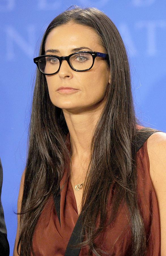

In [82]:
from fastdownload import download_url
dest = 'demi_moore.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Now let's do the same with "forest photos":

Searching for 'courteney cox photos'


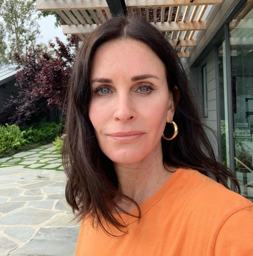

In [83]:
download_url(search_images('courteney cox photos', max_images=1)[0], 'courteney_cox.jpg', show_progress=False)
Image.open('courteney_cox.jpg').to_thumb(256,256)

Our searches seem to be giving reasonable results, so let's grab a few examples of each of "demi moore" and "courteney cox" photos, and save each group of photos to a different folder (I'm also trying to grab a range of lighting conditions here):

In [84]:
searches = 'courteney cox','demi moore'
path = Path('demimoore_or_not2')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'courteney cox photo'
Searching for 'courteney cox sun photo'
Searching for 'courteney cox shade photo'
Searching for 'demi moore photo'
Searching for 'demi moore sun photo'
Searching for 'demi moore shade photo'


#MKO NOTE 6/16/2024:

this one next section of code was added to the original notebook by the revisioner. It doesn't contribute to the program working...it just adds additional feedback for the person running the code.

In [85]:
print(path)
searches = 'courteney cox','demi moore'

for imageType in searches:
    print(imageType)
    content = os.listdir(path/imageType)
    for element in content:
        print(element)

demimoore_or_not2
courteney cox
fca1e7d3-5602-445b-a73f-7a79da6049ad.jpeg
511a9a72-db08-4bf2-9702-a309de2fb72e.jpg
d6d53b7e-e320-4bfa-89c9-b9afdc599294.jpg
78f1a76c-c328-4a7d-a1a0-6dccd579f557.jpg
0781cbfc-7cd9-4d98-bceb-d4f910869a3a.jpg
cfde5f6e-4380-4adf-a2c1-aaacdc734983.jpg
a9ab587e-74ec-4829-a9f7-8c09aff68f4b.jpg
e4b960a1-2378-4a28-b55b-3f78422ce6fc.jpeg
8db2ed41-eb93-4e3c-a486-e8268067e527.jpg
5aa5cbc3-026b-447e-bb7e-7029d005695c.jpg
d6d34a7e-2d5e-40c8-bf3b-90463d3c5578.jpg
2b35a972-ed54-4391-b090-aea280201c59.jpg
b7a3427c-ee45-45eb-96ca-07fbcd7c405b.jpg
824133ae-de68-4548-8b31-e5f569c0e084.jpg
58e9ba1c-9818-4599-be3e-99eb7e6eacaf.img
fff8e42d-d233-4c6d-a484-5847d99e2f9f.jpg
c3af8a93-63d9-428d-b715-bc4a30de90db.jpg
d79446b9-320a-45b8-811f-094b0b7448fc.jpg
d732f6b9-2b79-4ac9-8267-98081fb62cd2.jpg
7156204e-9720-4ad9-9348-7d9593f9629b.jpg
e781cffd-f144-47d9-b4f6-b34604cc7894.jpg
c3051d4d-7a49-47f3-9584-1fa5b7ac4a65.jpg
df25c285-515a-4698-8b26-f932473e134f.jpg
052dc808-35cf-4293-aa8a

## Step 2: Train our model

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [86]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

8

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

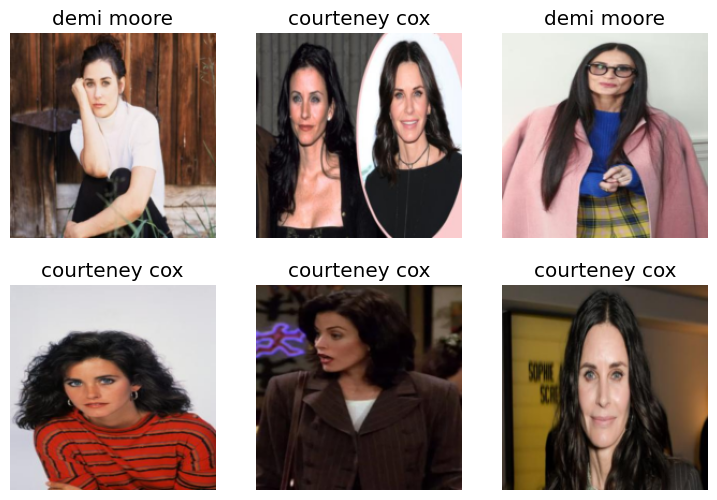

In [87]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Here what each of the `DataBlock` parameters means:

    blocks=(ImageBlock, CategoryBlock),

The inputs to our model are images, and the outputs are categories (in this case, "demi moore" or "courteney cox").

    get_items=get_image_files,

To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

Split the data into training and validation sets randomly, using 20% of the data for the validation set.

    get_y=parent_label,

The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be *demi moore* or *courteney cox*).

    item_tfms=[Resize(192, method='squish')]

Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).

Now we're ready to train our model. The fastest widely used computer vision model is `resnet18`. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

In [88]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Generally when I run this I see 100% accuracy on the validation set (although it might vary a bit from run to run).

"Fine-tuning" a model means that we're starting with a model someone else has trained using some other dataset (called the *pretrained model*), and adjusting the weights a little bit so that the model learns to recognise your particular dataset. In this case, the pretrained model was trained to recognise photos in *imagenet*, and widely-used computer vision dataset with images covering 1000 categories) For details on fine-tuning and why it's important, check out the [free fast.ai course](https://course.fast.ai/).

## Step 3: Use our model (and build your own!)

Let's see what our model thinks about that photo of demi moore that we downloaded at the start:

In [89]:
pred = learn.predict(PILImage.create('demi_moore.jpg'))
pred

('demi moore', tensor(1), tensor([0.1435, 0.8565]))

This is: demi moore.
Probability of prediction: 0.8565


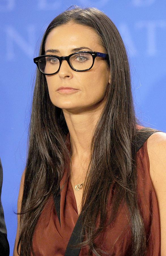

In [90]:
is_demi,_,probs = learn.predict(PILImage.create('demi_moore.jpg'))
print(f"This is: {is_demi}.")
print(f"Probability of prediction: {probs[_]:.4f}")
#print(f"Other Prob: {probs[1-_]:.4f}")
#print(f"dummy: {_}")
Image.open('demi_moore.jpg').to_thumb(256,256)

In [91]:
pred = learn.predict(PILImage.create('courteney_cox.jpg'))
pred

('courteney cox', tensor(0), tensor([0.9974, 0.0026]))

This is: courteney cox.
Probability of prediction: 0.9974


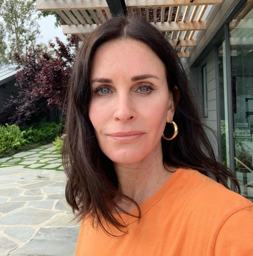

In [92]:
is_demi,_,probs = learn.predict(PILImage.create('courteney_cox.jpg'))
print(f"This is: {is_demi}.")
print(f"Probability of prediction: {probs[_]:.4f}")
#print(f"Other Prob: {probs[1-_]:.4f}")
#print(f"dummy: {_}")
Image.open('courteney_cox.jpg').to_thumb(256,256)

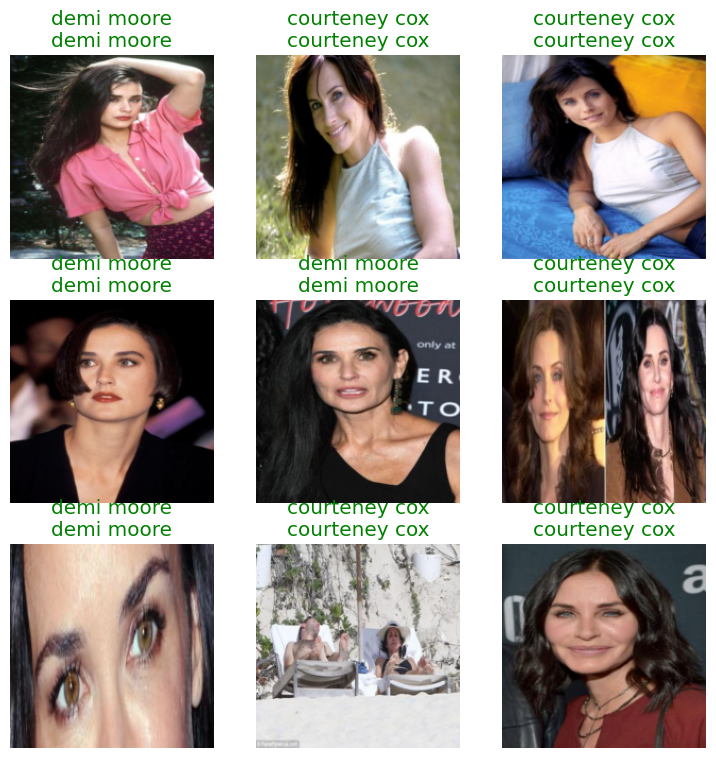

In [93]:
#mko add
learn.show_results()


Good job, resnet18. :)

So, as you see, in the space of a few years, creating computer vision classification models has gone from "so hard it's a joke" to "trivially easy and free"!

It's not just in computer vision. Thanks to deep learning, computers can now do many things which seemed impossible just a few years ago, including [creating amazing artworks](https://openai.com/dall-e-2/), and [explaining jokes](https://www.datanami.com/2022/04/22/googles-massive-new-language-model-can-explain-jokes/). It's moving so fast that even experts in the field have trouble predicting how it's going to impact society in the coming years.

One thing is clear -- it's important that we all do our best to understand this technology, because otherwise we'll get left behind!

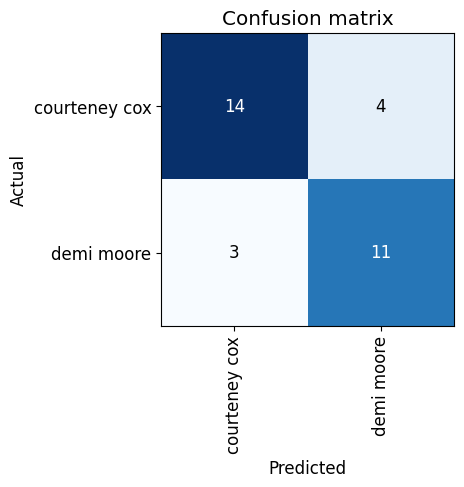

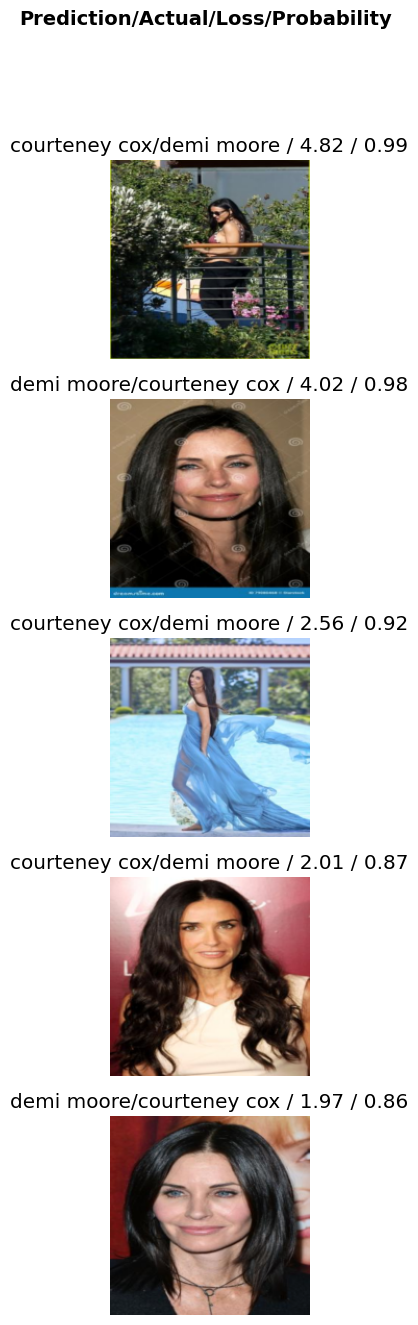

In [94]:

! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
#hide
from fastbook import *
from fastai.vision.widgets import *

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
#mko note: change below from 1 row to 5 rows, so can see labels
interp.plot_top_losses(5, nrows=5)

In [95]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [96]:
#This is code that will incorporate the 'cleaned' up labels/deletions
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

SuggestedLRs(valley=0.0005754399462603033)

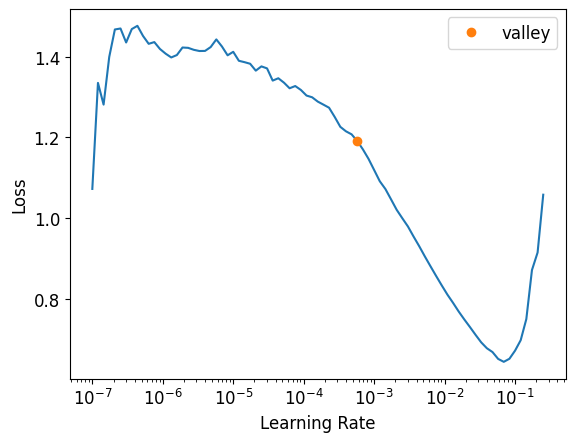

In [97]:
#mko
learn = vision_learner(dls, resnet18, metrics=error_rate)

#mko - find learning rate
learn.lr_find()
#mko looks like 0.004 might be optimal...anything smaller increases loss again - got stuck in local minima?
#but title ontop of graph is suggesting 0.0008


[('demi moore', 'courteney cox', 4), ('courteney cox', 'demi moore', 3)]

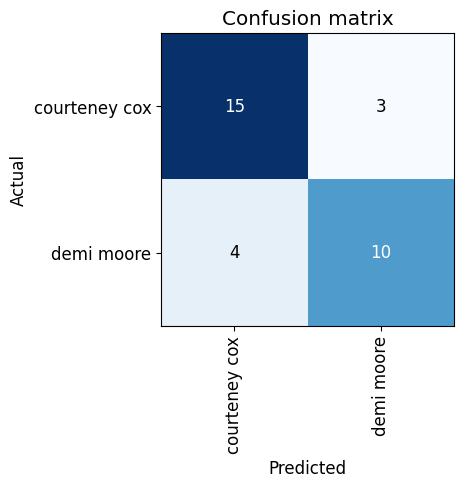

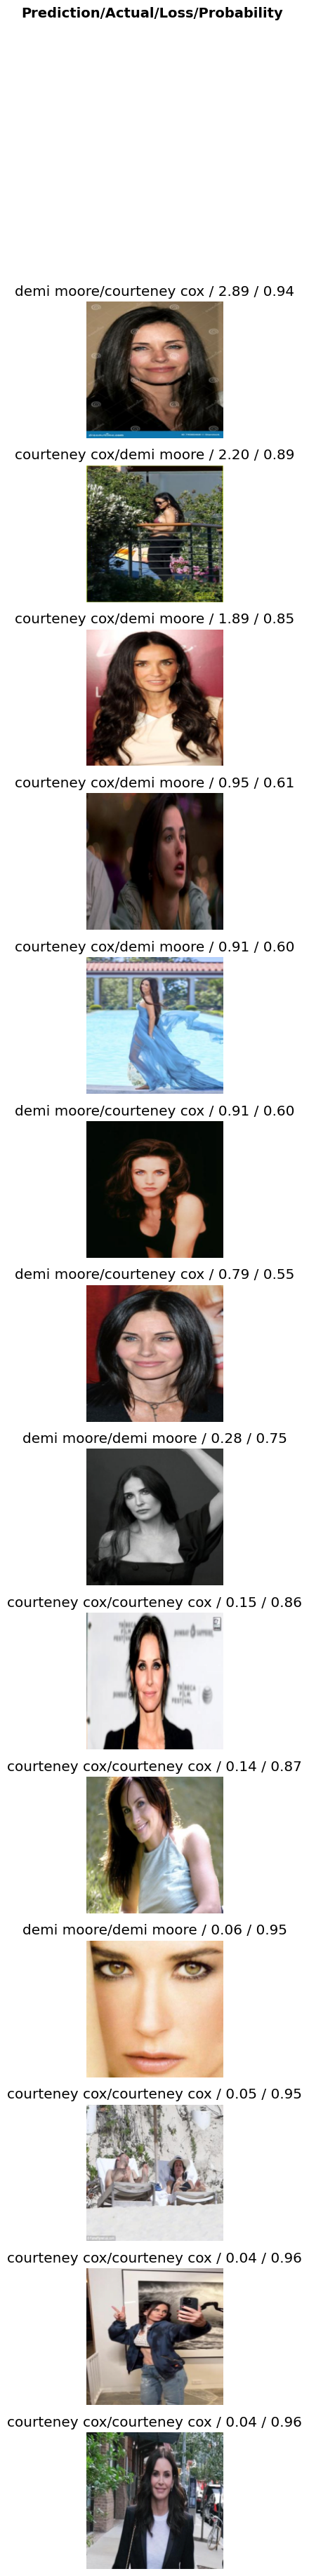

In [98]:
#mko - testing 0.004 as learning rate
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3, 0.004)

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(14, nrows=14)
interp.most_confused(min_val=2)

[('demi moore', 'courteney cox', 5), ('courteney cox', 'demi moore', 2)]

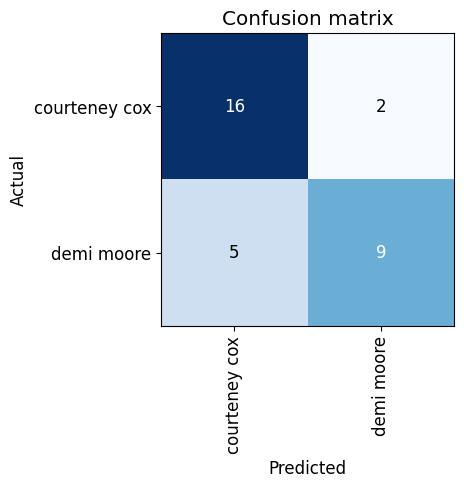

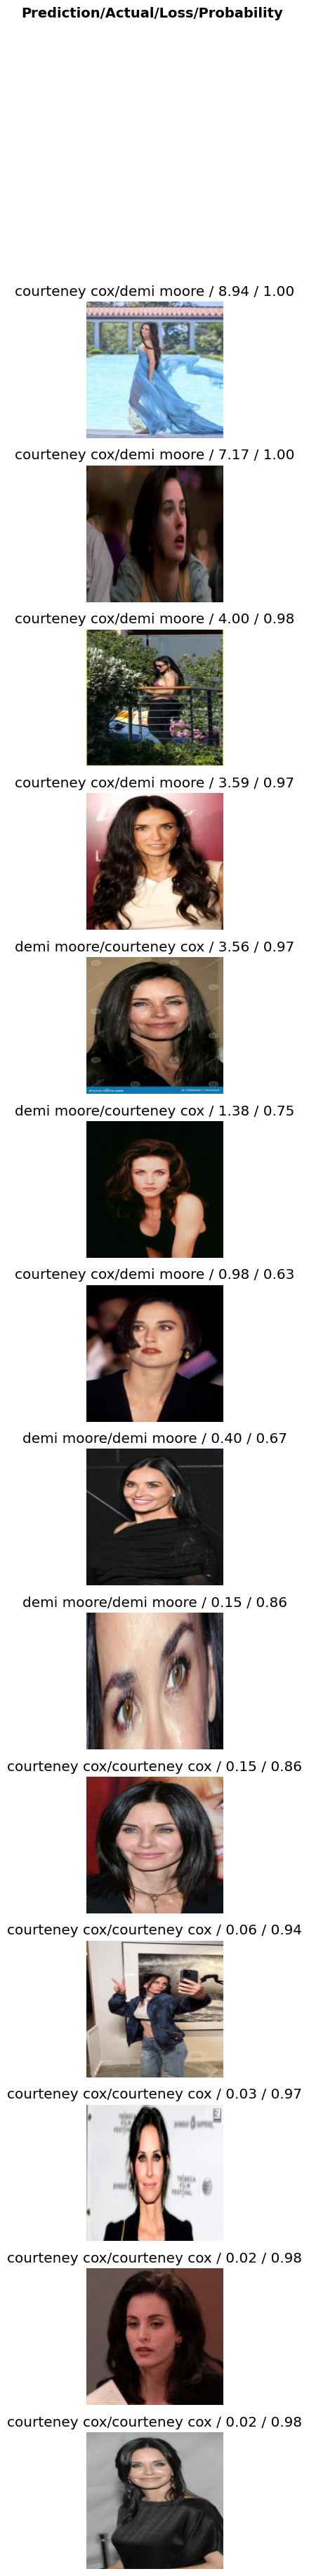

In [99]:
#mkocan resnet34 do better?
#mko - using 0.004 as learning rate
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3, 0.004)

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(14, nrows=14)
interp.most_confused(min_val=2)

In [100]:
!pip install timm
from fastai.vision.all import *
import timm

In [101]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [102]:
learn = vision_learner(dls, 'convnext_tiny', metrics=error_rate).to_fp16()
learn.fine_tune(3, 0.004)

NameError: name 'timm' is not defined

Now it's your turn. Click "Copy & Edit" and try creating your own image classifier using your own image searches!

If you enjoyed this, please consider clicking the "upvote" button in the top-right -- it's very encouraging to us notebook authors to know when people appreciate our work.